In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Librerías de ejemplo de NN
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [15]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

X = X.astype('float32') / 255.0
X = X.reshape(-1, 28*28)
y = to_categorical(y, num_classes=10)

X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28)

y_test = to_categorical(y_test, num_classes=10)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X: (60000, 784)
Forma de y: (60000, 10)
Forma de X_test: (10000, 784)
Forma de y_test: (10000, 10)


In [16]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

X = X.astype('float32') / 255.0
X = X.reshape(-1, 28*28)
y = to_categorical(y, num_classes=10)

X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28)

y_test = to_categorical(y_test, num_classes=10)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X: (60000, 784)
Forma de y: (60000, 10)
Forma de X_test: (10000, 784)
Forma de y_test: (10000, 10)


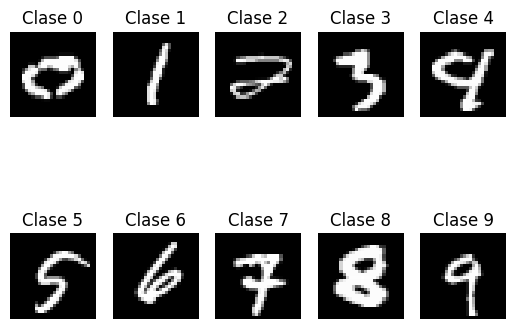

In [17]:
#muestra una imagen de cada categoria
import random
for i in range(10):
    idx = random.choice(np.where(y[:, i] == 1)[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Clase {i}')
plt.show()

In [18]:
# define la funcion que crea el modelo MLP con keras
def crear_modelo(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [19]:
# Entrena un modelo con los datos de entrenamiento
create_mlp = crear_modelo
model = create_mlp(input_dim=28*28, num_classes=10)       
model.summary()
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


c:\Users\josep\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9209 - loss: 0.2736 - val_accuracy: 0.9595 - val_loss: 0.1419
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9662 - loss: 0.1124 - val_accuracy: 0.9682 - val_loss: 0.1049
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9760 - loss: 0.0778 - val_accuracy: 0.9702 - val_loss: 0.1055
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9815 - loss: 0.0600 - val_accuracy: 0.9678 - val_loss: 0.1042
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9850 - loss: 0.0476 - val_accuracy: 0.9730 - val_loss: 0.1022
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9881 - loss: 0.0368 - val_accuracy: 0.9700 - val_loss: 0.1096
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9898 - loss: 0.0314 - val_accuracy: 0.9723 - val_loss: 0.1215
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9914 - loss: 0.0252 - 

In [20]:
# Evalua el modelo con los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [25]:
import pickle
import os
import numpy as np
import cv2
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [24]:
#En esta sección ser cargan las imágenes a color de emojis. Las imágenes
#se orginizan en 5 directorios, los cuales son: Angry, Happy, Poo, Sad y Surprise.
#Los nombres de las imágenes no están estandarizadas, por lo que es necesario primero ver qué hay
#en cada directorio y después cargarlas.
path = "/Users/josep/Downloads/Emojis/"

emojis = []
labels = ['Angry', 'Happy', 'Poo', 'Sad', 'Surprised']
for label in labels:
    folder = os.path.join(path, label)
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                emojis.append((img, label))

print("Número total de imágenes cargadas:", len(emojis)) 
#Muestra una imagen de cada categoría
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    for img, img_label in emojis:
        if img_label == label:
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.title(label)
            plt.axis('off')
            break
#Preprocesamiento de las imágenes. Las imágenes las vamos a pasar a escala de grises, a un
#tamaño de 32x32 píxeles. Desafortunadamente, los trazos no están centrados en la imagen, por lo que
#también es necesario encontrar la zona del trazo, y recortarlo para después centrarlo en la imagen.
def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Imagen binaria (fondo blanco, trazos negros)
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARYINV, 11, 2)
    contours,  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        min_area = 30
        all_points = np.vstack([cnt for cnt in contours if cv2.contourArea(cnt) > min_area])
        x, y, w, h = cv2.boundingRect(all_points)
        roi = binary[y:y+h, x:x+w]  # Usar la imagen binaria
        roi_resized = cv2.resize(roi, (32, 32), interpolation=cv2.INTER_AREA)
        padded = np.pad(roi_resized, ((2, 2), (2, 2)), mode='constant', constant_values=0)
        return padded
    else:
        return cv2.resize(binary, (32, 32), interpolation=cv2.INTER_AREA)

preprocessed_emojis = [(preprocess_image(img), label) for img, label in emojis]
print("Número total de imágenes preprocesadas:", len(preprocessed_emojis))
#Muestra una imagen de cada categoría preprocesada
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    for img, img_label in preprocessed_emojis:
        if img_label == label:
            plt.subplot(1, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(label)
            plt.axis('off')
            break

NameError: name 'cv2' is not defined